# MURA exploration

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision.transforms as transforms
import torch
desktop_path = '/Users/jornelasmunoz/Desktop/UC Merced/Research/coded-aperture/jornelasmunoz/'
laptop_path = '/Users/jocelynornelas/iCloud Drive (Archive)/Desktop/UC Merced/Research/coded-aperture/jornelasmunoz/'
if desktop_path in sys.path[0]: sys.path.insert(0, desktop_path + 'lib/'); path = desktop_path
elif laptop_path in sys.path[0]: sys.path.insert(0, laptop_path + 'lib/'); path = laptop_path
print('Using path = ', path)

import MURA as mura
from dataset import MNIST_MURA

Using path =  /Users/jornelasmunoz/Desktop/UC Merced/Research/coded-aperture/jornelasmunoz/


In [3]:
params = {
    'image_size': 23,
    # 'snr': None,
}

# Define transforms 
train_transform_list =[
                        # transforms.Grayscale(),
                       # transforms.ToTensor(),
                       transforms.Resize(params['image_size'], antialias=True), 
                      ]
test_transform_list = [
                        # transforms.Grayscale(),
                       # transforms.ToTensor(),
                       transforms.Resize(params['image_size'], antialias=True), 
                      ]
train_transform = transforms.Compose(train_transform_list)
test_transform =   transforms.Compose(test_transform_list) 
mura_data = MNIST_MURA('../data/MNIST/', params, transform=train_transform, target_transform=test_transform, train=True)
loader = torch.utils.data.DataLoader(mura_data, batch_size=100, shuffle=False)

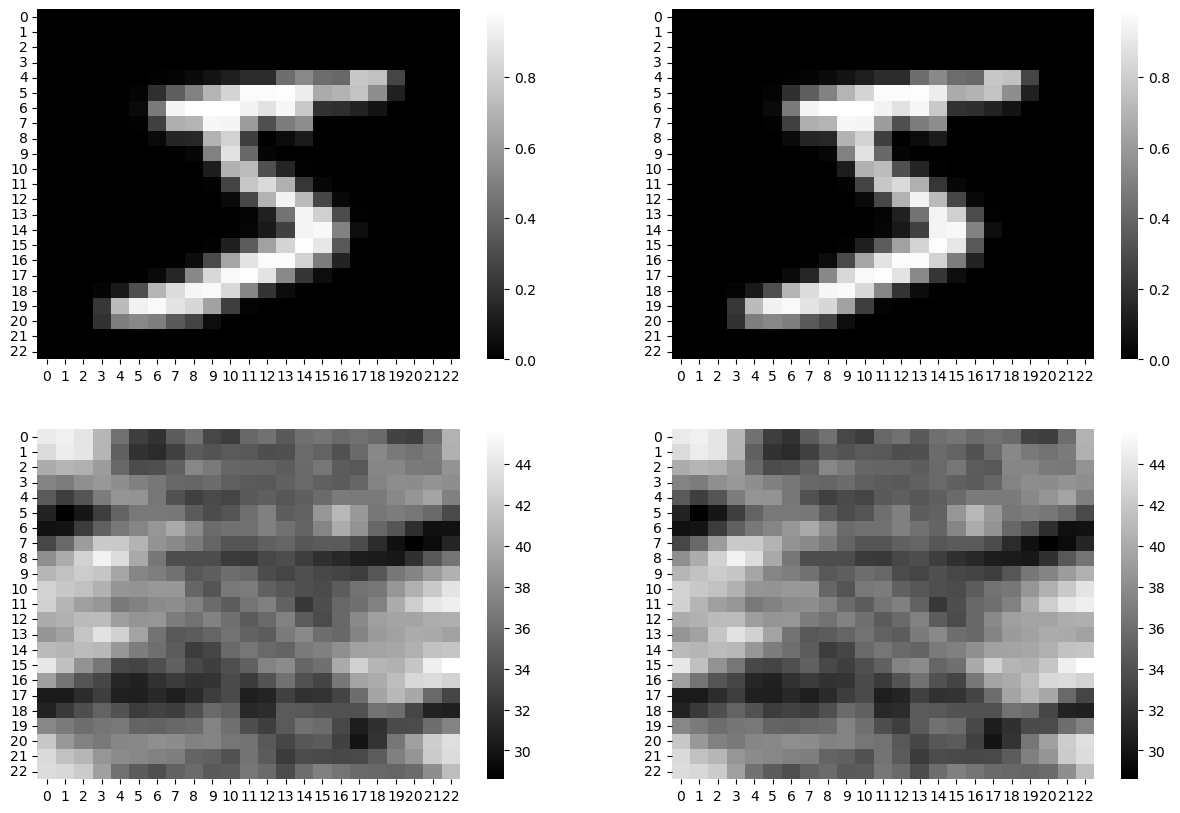

In [4]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
axs = axs.ravel()
sns.heatmap(mura_data.targets[0].squeeze(0), cmap='gray', ax=axs[0])

sns.heatmap(mura_data.data[0].squeeze(0), cmap='gray', ax=axs[2])
sns.heatmap(loader.dataset[0]['target'].squeeze(0), cmap='gray', ax=axs[1])
sns.heatmap(loader.dataset[0]['img'].squeeze(0), cmap='gray', ax=axs[3])
plt.show()

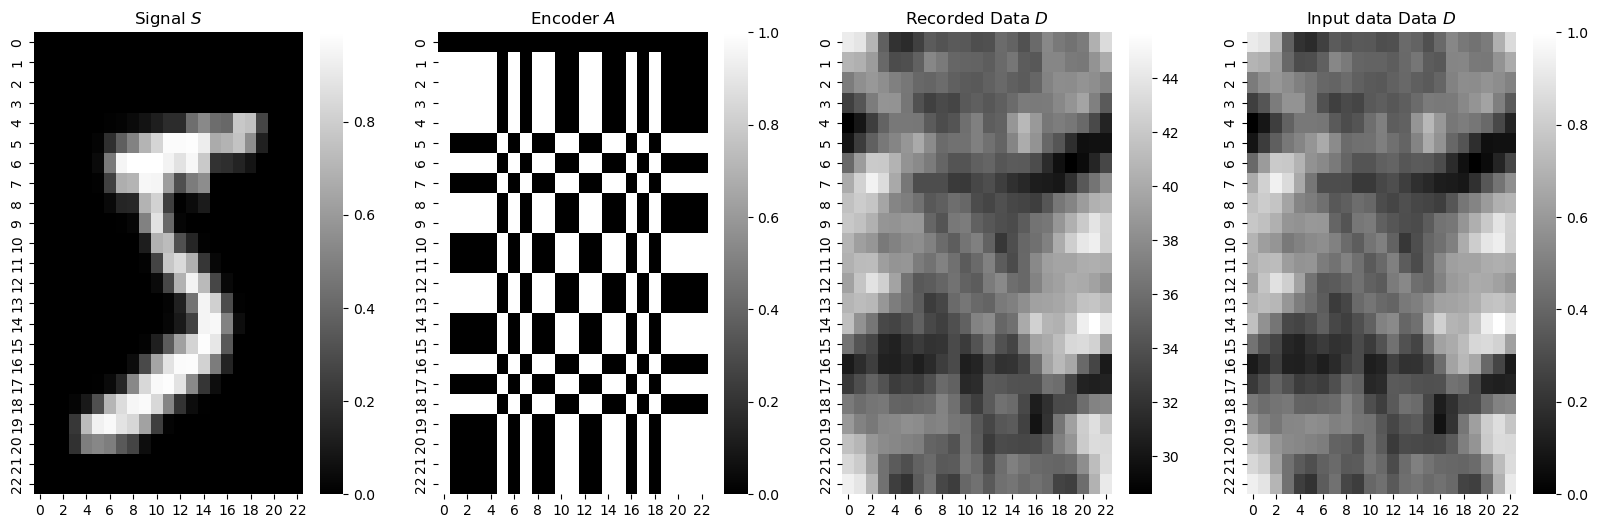

In [25]:
A = mura_data.A
G = mura_data.G
S = loader.dataset[0]['target'].squeeze(0).numpy()#mura_data.targets[0].numpy()
D = mura.FFT_convolve(mura_data.A, S)
D_load = loader.dataset[0]['img'].squeeze(0).numpy()

# Plot arrays
fig, axs = plt.subplots(1,4, figsize=(20,6))
axs = axs.ravel()
sns.heatmap(S, cmap='gray', ax =axs[0])
sns.heatmap(A, cmap='gray', ax =axs[1])
sns.heatmap(D, cmap='gray', ax =axs[2])
sns.heatmap(D_load, cmap='gray', ax =axs[3])

# axs[0].imshow(A, cmap='gray')
# axs[1].imshow(G, cmap='gray')
axs[0].set_title("Signal $S$")
axs[1].set_title("Encoder $A$")
axs[2].set_title("Recorded Data $D$")
axs[3].set_title("Input data Data $D$")
plt.show()

In [35]:
S.min()

0.0

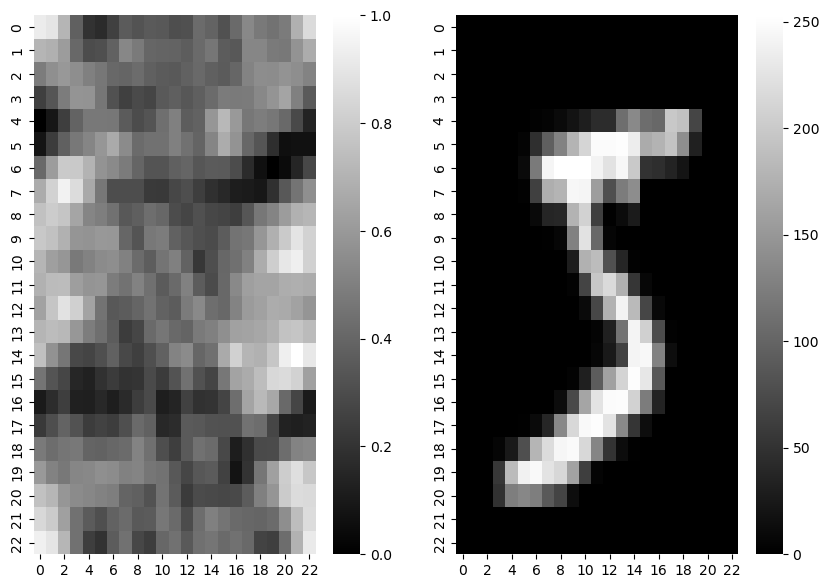

In [37]:
# Visualize data
fig, axs = plt.subplots(1,2, figsize=(10,7))
idx=4
sns.heatmap(mura_data.data[0], cmap= 'gray', ax=axs[0])
sns.heatmap(mura_data.targets[0], cmap= 'gray', ax=axs[1])
# axs[0].axis('off')
# axs[1].axis('off')
plt.show()